#Preprocessing of Data

In [2]:
#Import all the libraries
import numpy as np
import scipy.io
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import requests
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import requests
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.svm import SVC
from tensorflow.keras.layers import Dense, Flatten


In [3]:
# URLs for the datasets
train_url = "http://ufldl.stanford.edu/housenumbers/train_32x32.mat"
test_url = "http://ufldl.stanford.edu/housenumbers/test_32x32.mat"

# Function to download and save the file
def download_file(url, filename):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(filename, 'wb') as file:
            for chunk in response.iter_content(chunk_size=1024):
                file.write(chunk)
        print(f"{filename} downloaded successfully.")
    else:
        print(f"Failed to download {filename}")

# Download the datasets
download_file(train_url, 'train_32x32.mat')
download_file(test_url, 'test_32x32.mat')

# Load the training and testing data
train_data = scipy.io.loadmat('train_32x32.mat')
test_data = scipy.io.loadmat('test_32x32.mat')

# Extract images and labels from the loaded dataset
X_train = train_data['X']  # Training images
y_train = train_data['y']  # Training labels
X_test = test_data['X']    # Testing images
y_test = test_data['y']    # Testing labels

# Transpose the images to be in the shape (N, H, W, C)
X_train = np.transpose(X_train, (3, 0, 1, 2))  # Shape: (N, 32, 32, 3)
X_test = np.transpose(X_test, (3, 0, 1, 2))    # Shape: (N, 32, 32, 3)

# Flatten the labels to be 1D arrays
y_train = y_train.flatten()  # Shape: (N,)
y_test = y_test.flatten()    # Shape: (N,)

# Adjust labels to convert '10' to '0' since the labels for digit '0' are marked as '10' in the dataset
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)


train_32x32.mat downloaded successfully.
test_32x32.mat downloaded successfully.
Training data shape: (73257, 32, 32, 3)
Training labels shape: (73257,)
Testing data shape: (26032, 32, 32, 3)
Testing labels shape: (26032,)


In [4]:
#Normalize the images to range [0, 1] to improve efficiency and performance of Machine Learning
X_train = X_train / 255.0
X_test = X_test / 255.0

#Running Machine Learning Models

In [5]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Training data shape after split:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Training labels shape after split:", y_train.shape)
print("Validation labels shape:", y_val.shape)


Training data shape after split: (58605, 32, 32, 3)
Validation data shape: (14652, 32, 32, 3)
Training labels shape after split: (58605,)
Validation labels shape: (14652,)


In [6]:
# Flatten the training, validation, and testing sets
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Shape: (N, 3072)
X_val_flat = X_val.reshape(X_val.shape[0], -1)        # Shape: (N, 3072)
X_test_flat = X_test.reshape(X_test.shape[0], -1)      # Shape: (N, 3072)

print("Flattened training data shape:", X_train_flat.shape)
print("Flattened validation data shape:", X_val_flat.shape)
print("Flattened testing data shape:", X_test_flat.shape)

Flattened training data shape: (58605, 3072)
Flattened validation data shape: (14652, 3072)
Flattened testing data shape: (26032, 3072)


In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Flatten the images for compatibility with traditional ML models
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Shape: (N, 3072)
X_val_flat = X_val.reshape(X_val.shape[0], -1)        # Shape: (N, 3072)
X_test_flat = X_test.reshape(X_test.shape[0], -1)      # Shape: (N, 3072)

# Create and train the Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_flat, y_train)


DecisionTreeClassifier(random_state=42)

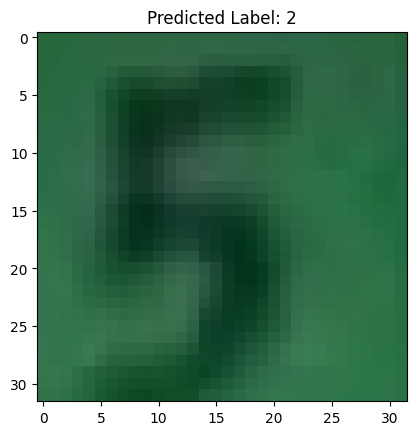

Frequently misclassified class pairs:
Class 2 is misclassified as Class 3: 390 times
Class 1 is misclassified as Class 3: 348 times
Class 2 is misclassified as Class 1: 347 times
Class 2 is misclassified as Class 7: 345 times
Class 3 is misclassified as Class 1: 334 times

Insights on Misclassifications:
The misclassifications could occur due to visual similarities between some digits, variations in writing styles, or poor lighting conditions. For instance, digits like '1' and '7' can often look similar if the lines are thin, and '0' and '8' might be confused due to their rounded shapes.

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.30      0.30      0.30      1744
           1       0.59      0.57      0.58      5099
           2       0.48      0.41      0.45      4149
           3       0.33      0.34      0.33      2882
           4       0.42      0.50      0.46      2523
           5       0.32      0.31      0

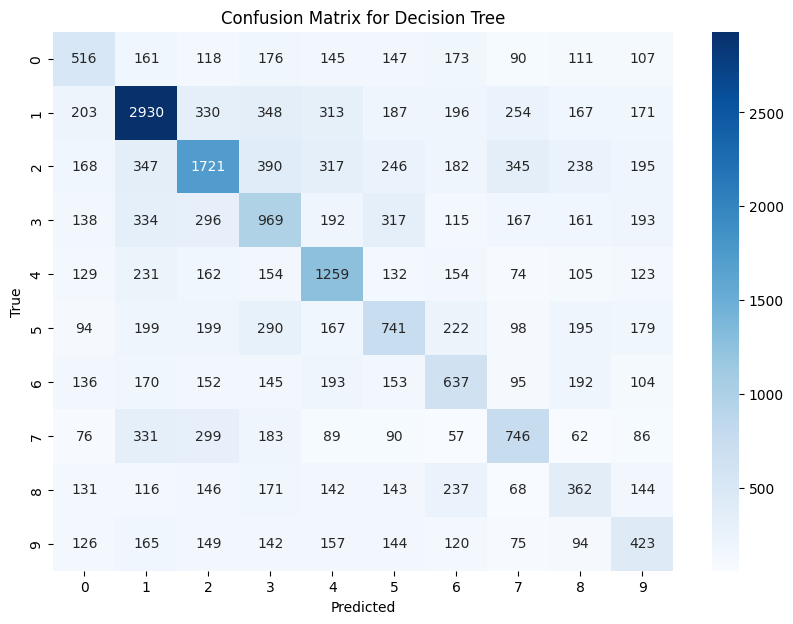


Test Accuracy (Decision Tree): 0.395820528580209


In [7]:
# Predict on the test set
y_pred_test = dt_clf.predict(X_test_flat)

confidences = dt_clf.predict_proba(X_test_flat)  # Confidence for each class
max_confidence_index = np.argmax(np.max(confidences, axis=1))  # Find the index of the highest confidence prediction

# Plot the corresponding image
plt.imshow(X_test[max_confidence_index])
plt.title(f"Predicted Label: {y_pred_test[max_confidence_index]}")
plt.show()

# 2. Analyze Misclassifications
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Identify pairs of classes that are frequently misclassified
# Looking at off-diagonal elements of the confusion matrix to find the maximum misclassifications
misclassified_pairs = []
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        if i != j and conf_matrix[i][j] > 0:
            misclassified_pairs.append((i, j, conf_matrix[i][j]))

# Sorting pairs by misclassification frequency
sorted_misclassifications = sorted(misclassified_pairs, key=lambda x: x[2], reverse=True)
print("Frequently misclassified class pairs:")
for pair in sorted_misclassifications[:5]:
    print(f"Class {pair[0]} is misclassified as Class {pair[1]}: {pair[2]} times")

# Provide insights on why misclassifications might occur
print("\nInsights on Misclassifications:")
print("The misclassifications could occur due to visual similarities between some digits, variations in writing styles, or poor lighting conditions. For instance, digits like '1' and '7' can often look similar if the lines are thin, and '0' and '8' might be confused due to their rounded shapes.")

# 3. Compare Performance Metrics
# Print classification report
print('\nClassification Report (Decision Tree):')
print(classification_report(y_test, y_pred_test))

# Plot Confusion Matrix for Final Model
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Overall Performance Summary
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'\nTest Accuracy (Decision Tree): {test_accuracy}')


In [9]:
# Further tuning to find a better balance between bias and variance
dt_clf_tuned_2 = DecisionTreeClassifier(max_depth=20, min_samples_split=2, random_state=42)
dt_clf_tuned_2.fit(X_train_flat, y_train)
y_pred_tuned_2 = dt_clf_tuned_2.predict(X_test_flat)
test_accuracy_tuned_2 = accuracy_score(y_test, y_pred_tuned_2)
print('Test Accuracy (Further Tuned Decision Tree):', test_accuracy_tuned_2)


Test Accuracy (Further Tuned Decision Tree): 0.4010832821143208


#Random Forest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_clf.fit(X_train_flat, y_train)

# Predict on the test set and calculate accuracy
y_pred_rf = rf_clf.predict(X_test_flat)
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Test Accuracy (Random Forest):', test_accuracy_rf)


Test Accuracy (Random Forest): 0.6576521204671174


Best parameters for Random Forest: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
Test Accuracy (Random Search Tuned Random Forest): 0.6727489244007375


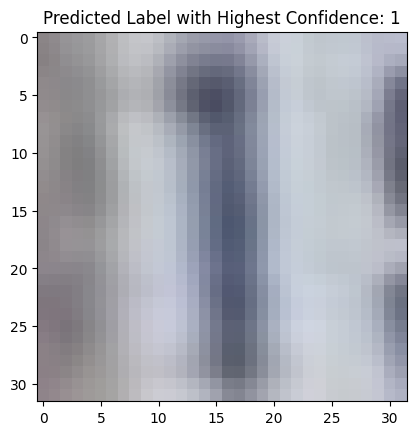

Frequently misclassified class pairs:
Class 3 is misclassified as Class 1: 642 times
Class 7 is misclassified as Class 1: 500 times
Class 2 is misclassified as Class 1: 426 times
Class 4 is misclassified as Class 1: 340 times
Class 7 is misclassified as Class 2: 304 times

Insights on Misclassifications:
Random Forest can struggle with classes that are visually similar. Digits like '3' and '5' or '0' and '8' have overlapping features that can lead to confusion. Additionally, the quality and angle of the image can influence misclassification.

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.78      0.56      0.65      1744
           1       0.60      0.91      0.73      5099
           2       0.69      0.77      0.73      4149
           3       0.65      0.58      0.61      2882
           4       0.61      0.76      0.68      2523
           5       0.76      0.58      0.66      2384
           6       0.65      0.58

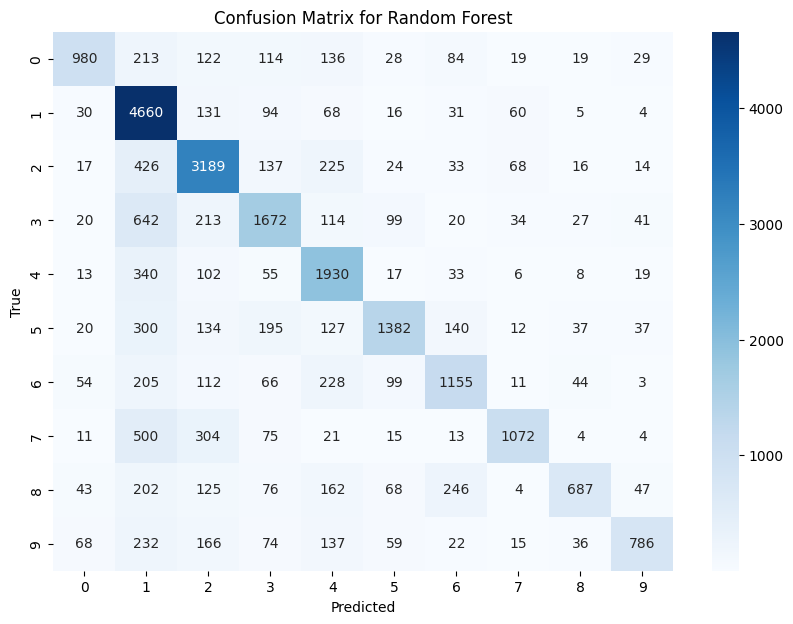

In [11]:
# Step 1: Import Necessary Libraries
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Hyperparameter Tuning with RandomizedSearchCV
# Define a smaller parameter grid for Randomized Search
param_dist_rf = {
    'n_estimators': [50, 100, 150],          # Fewer values to search
    'max_depth': [10, 20, None],             # Keep some complexity but reduce number of options
    'min_samples_split': [2, 5],             # Limit number of values for efficiency
    'min_samples_leaf': [1, 2, 4],           # Add min_samples_leaf for better generalization
}

# Instantiate RandomizedSearchCV for Random Forest
random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=10,                              # Number of random combinations to try (reduce for speed)
    cv=3,                                   # Cross-validation folds
    scoring='accuracy',
    n_jobs=-1,                              # Use all available cores for parallel processing
    random_state=42
)

# Use a smaller subset of the training data for hyperparameter tuning to speed up the process
subset_indices = np.random.choice(X_train_flat.shape[0], size=10000, replace=False)
X_train_subset = X_train_flat[subset_indices]
y_train_subset = y_train[subset_indices]

# Perform Randomized Search on the subset of training data
random_search_rf.fit(X_train_subset, y_train_subset)

# Best parameters from randomized search
print("Best parameters for Random Forest:", random_search_rf.best_params_)

# Step 3: Train the Best Model on the Full Training Dataset
best_rf_clf = random_search_rf.best_estimator_
best_rf_clf.fit(X_train_flat, y_train)  # Train the best estimator on the full training dataset

# Step 4: Evaluate the Best Model on the Test Set
y_pred_best_rf = best_rf_clf.predict(X_test_flat)
test_accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print('Test Accuracy (Random Search Tuned Random Forest):', test_accuracy_best_rf)

# Step 5: Evaluation and Analysis
# 5.1 Identify the Label in the Test Data with the Highest Confidence
# Predict probabilities to find the label with the highest confidence
y_proba_best_rf = best_rf_clf.predict_proba(X_test_flat)
highest_confidence_index_rf = np.argmax(np.max(y_proba_best_rf, axis=1))

# Plot the corresponding image with the highest confidence
plt.imshow(X_test[highest_confidence_index_rf])
plt.title(f"Predicted Label with Highest Confidence: {y_pred_best_rf[highest_confidence_index_rf]}")
plt.show()

# 5.2 Analyze Misclassifications
# Confusion matrix for the Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_best_rf)

# Identify pairs of classes that are frequently misclassified
misclassified_pairs_rf = []
for i in range(len(conf_matrix_rf)):
    for j in range(len(conf_matrix_rf)):
        if i != j and conf_matrix_rf[i][j] > 0:
            misclassified_pairs_rf.append((i, j, conf_matrix_rf[i][j]))

# Sorting pairs by misclassification frequency
sorted_misclassifications_rf = sorted(misclassified_pairs_rf, key=lambda x: x[2], reverse=True)
print("Frequently misclassified class pairs:")
for pair in sorted_misclassifications_rf[:5]:
    print(f"Class {pair[0]} is misclassified as Class {pair[1]}: {pair[2]} times")

# Provide insights on why misclassifications might occur
print("\nInsights on Misclassifications:")
print("Random Forest can struggle with classes that are visually similar. Digits like '3' and '5' or '0' and '8' have overlapping features that can lead to confusion. Additionally, the quality and angle of the image can influence misclassification.")

# 5.3 Compare Performance Metrics
# Print classification report
print('\nClassification Report (Random Forest):')
print(classification_report(y_test, y_pred_best_rf))

# Plot Confusion Matrix for Final Model
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest')
plt.show()


#SVM

Test Accuracy (SVM with RBF Kernel and PCA): 0.5153272894898586


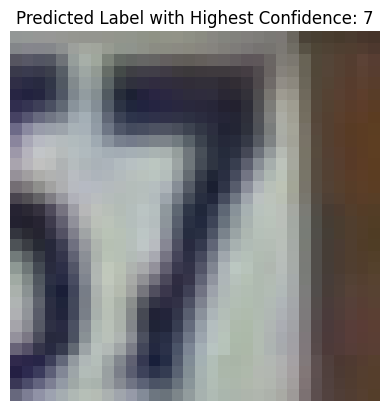

Frequently misclassified class pairs:
Class 3 is misclassified as Class 1: 1202 times
Class 2 is misclassified as Class 1: 1201 times
Class 5 is misclassified as Class 1: 830 times
Class 4 is misclassified as Class 1: 758 times
Class 7 is misclassified as Class 1: 715 times

Insights on Misclassifications:
SVM with an RBF kernel and PCA can find non-linear boundaries, but some misclassifications occur due to visually similar digits and inherent complexity of the data.

Classification Report (SVM with RBF Kernel and PCA):
              precision    recall  f1-score   support

           0       0.58      0.44      0.50      1744
           1       0.40      0.91      0.56      5099
           2       0.53      0.62      0.57      4149
           3       0.56      0.34      0.42      2882
           4       0.72      0.54      0.62      2523
           5       0.65      0.33      0.43      2384
           6       0.62      0.33      0.43      1977
           7       0.78      0.37      0

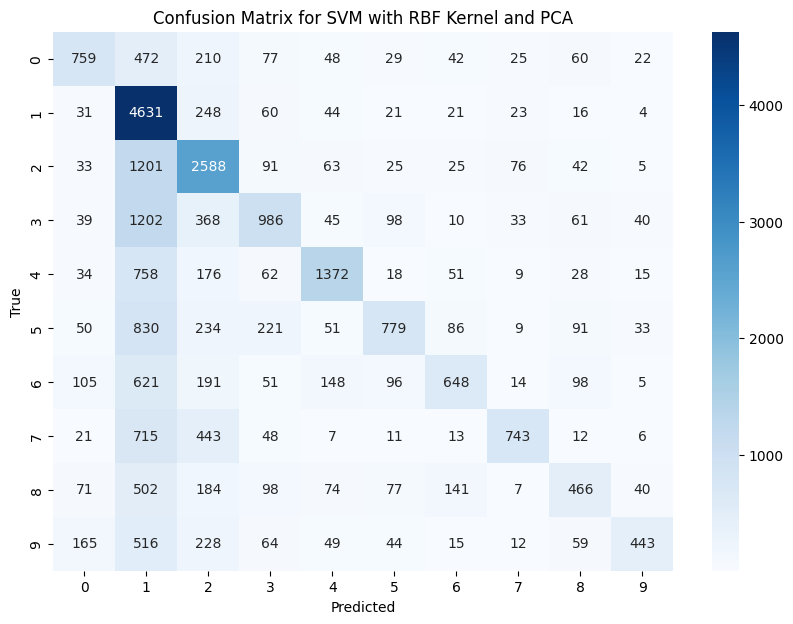

In [12]:
# Step 1: Import Necessary Libraries
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Step 2: Use a Smaller Subset of the Training Data for Training
subset_size = 10000  # Reduce to 10,000 samples to speed up training
subset_indices = np.random.choice(X_train_flat.shape[0], size=subset_size, replace=False)
X_train_subset = X_train_flat[subset_indices]
y_train_subset = y_train[subset_indices]

# Step 3: Dimensionality Reduction using PCA
pca = PCA(n_components=150)  # Reduce to 150 dimensions
X_train_pca = pca.fit_transform(X_train_subset)
X_test_pca = pca.transform(X_test_flat)

# Step 4: Train the SVM Classifier with RBF Kernel for Non-Linear Boundaries
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm_clf.fit(X_train_pca, y_train_subset)

# Step 5: Predict on the Test Set
y_pred_test_svm = svm_clf.predict(X_test_pca)

# Calculate the Test Accuracy
test_accuracy_svm = accuracy_score(y_test, y_pred_test_svm)
print('Test Accuracy (SVM with RBF Kernel and PCA):', test_accuracy_svm)

# Step 6: Evaluation and Analysis
# 6.1 Identify the Label in the Test Data with the Highest Confidence
y_proba_test_svm = svm_clf.predict_proba(X_test_pca)
highest_confidence_index_svm = np.argmax(np.max(y_proba_test_svm, axis=1))
img_to_plot_svm = X_test[highest_confidence_index_svm]

if np.max(img_to_plot_svm) <= 1:
    img_to_plot_svm = (img_to_plot_svm * 255).astype(np.uint8)  # Rescale for proper visualization

plt.imshow(img_to_plot_svm)
plt.title(f"Predicted Label with Highest Confidence: {y_pred_test_svm[highest_confidence_index_svm]}")
plt.axis('off')
plt.show()

# 6.2 Analyze Misclassifications
conf_matrix_svm = confusion_matrix(y_test, y_pred_test_svm)
misclassified_pairs_svm = [(i, j, conf_matrix_svm[i][j]) for i in range(len(conf_matrix_svm)) for j in range(len(conf_matrix_svm)) if i != j and conf_matrix_svm[i][j] > 0]
sorted_misclassifications_svm = sorted(misclassified_pairs_svm, key=lambda x: x[2], reverse=True)
print("Frequently misclassified class pairs:")
for pair in sorted_misclassifications_svm[:5]:
    print(f"Class {pair[0]} is misclassified as Class {pair[1]}: {pair[2]} times")

print("\nInsights on Misclassifications:")
print("SVM with an RBF kernel and PCA can find non-linear boundaries, but some misclassifications occur due to visually similar digits and inherent complexity of the data.")

# 6.3 Compare Performance Metrics
print('\nClassification Report (SVM with RBF Kernel and PCA):')
print(classification_report(y_test, y_pred_test_svm))

# Plot Confusion Matrix for Final Model
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM with RBF Kernel and PCA')
plt.show()

Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Test Accuracy: 0.7348263675476336
Confusion Matrix:
 [[1227   74   49   73   55   45   82   34   39   66]
 [  46 4476  127  113  109   28   50   96   23   31]
 [  44  287 3262  144   96   40   46  121   47   62]
 [  46  352  167 1786   51  132   23   56   65  204]
 [  43  182   65   50 2013   21   62   24   22   41]
 [  38  162   87  184   60 1552  148   24   67   62]
 [ 102  118   49   50  130   76 1347   19   60   26]
 [  29  250  157   64   15   15   15 1449    6   19]
 [  78  107   61   84   70   50  158   20  958   74]
 [ 110   98   99   54   42   40   24   29   40 1059]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70      1744
           1       0.73      0.88      0.80      5099
           2       0.79      0.79      0.79      4149
           3       0.69      0.62      0.65      2882
           4       0.76      0.80      0.78      2523
     

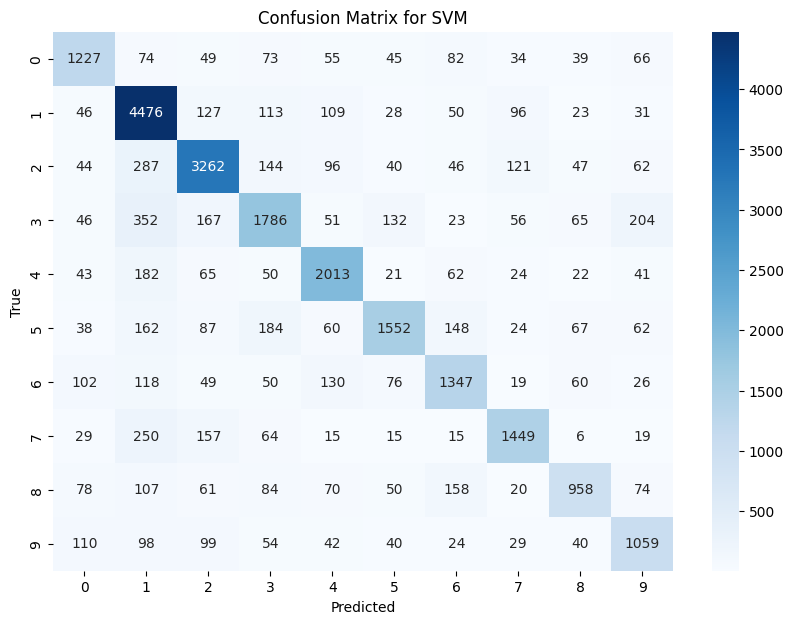

In [7]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# 1. Data Preprocessing (Assuming you have X_train, y_train, X_test, y_test)
# Flatten the image data if it's not already flattened:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# 2. Dimensionality Reduction with PCA (Reduced number of components for speed)
pca = PCA(n_components=100)  # Set a fixed number of components to speed up PCA
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

# 3. Hyperparameter Tuning with GridSearchCV (Reduced hyperparameter options for speed)
param_grid = {
    'C': [1, 10],  # Reduced options for 'C'
    'gamma': ['scale'],  # Limited gamma to 'scale' to avoid high computational cost
    'kernel': ['linear', 'rbf']  # Kept only linear and rbf kernels
}

# Using a subset of the data for grid search to speed up the process
subset_size = 10000
X_train_subset = X_train_pca[:subset_size]
y_train_subset = y_train[:subset_size]

# 4. Grid Search with reduced data subset
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_subset, y_train_subset)

print("Best parameters:", grid_search.best_params_)

# 5. Train the Best SVM Model
best_svm_clf = grid_search.best_estimator_
best_svm_clf.fit(X_train_pca, y_train)

# 6. Predictions and Evaluation
y_pred = best_svm_clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# 7. Detailed Analysis (Confusion Matrix, Classification Report)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# 8. Visualization (Optional)
# Plot the confusion matrix using seaborn:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM')
plt.show()


#Neural Network

Epoch 1/10
1466/1466 - 17s - 12ms/step - accuracy: 0.1831 - loss: 2.2492 - val_accuracy: 0.1878 - val_loss: 2.2301
Epoch 2/10
1466/1466 - 7s - 5ms/step - accuracy: 0.2209 - loss: 2.1364 - val_accuracy: 0.2770 - val_loss: 2.0350
Epoch 3/10
1466/1466 - 9s - 6ms/step - accuracy: 0.3605 - loss: 1.8181 - val_accuracy: 0.4070 - val_loss: 1.7024
Epoch 4/10
1466/1466 - 8s - 5ms/step - accuracy: 0.4762 - loss: 1.5506 - val_accuracy: 0.5135 - val_loss: 1.4733
Epoch 5/10
1466/1466 - 9s - 6ms/step - accuracy: 0.5596 - loss: 1.3539 - val_accuracy: 0.5591 - val_loss: 1.3478
Epoch 6/10
1466/1466 - 8s - 6ms/step - accuracy: 0.5889 - loss: 1.2772 - val_accuracy: 0.6121 - val_loss: 1.2280
Epoch 7/10
1466/1466 - 7s - 5ms/step - accuracy: 0.6086 - loss: 1.2287 - val_accuracy: 0.5897 - val_loss: 1.2925
Epoch 8/10
1466/1466 - 8s - 6ms/step - accuracy: 0.6193 - loss: 1.2011 - val_accuracy: 0.6138 - val_loss: 1.2352
Epoch 9/10
1466/1466 - 11s - 7ms/step - accuracy: 0.6266 - loss: 1.1807 - val_accuracy: 0.6052

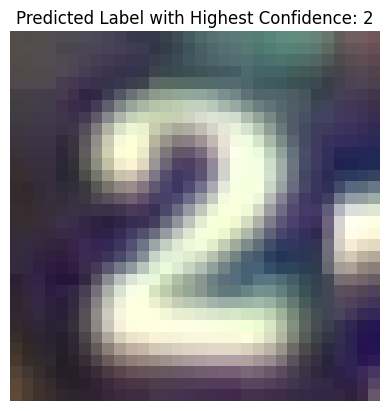

Frequently misclassified class pairs (NN - 5,000 parameters):
Class 8 is misclassified as Class 6: 498 times
Class 2 is misclassified as Class 1: 398 times
Class 3 is misclassified as Class 1: 394 times
Class 9 is misclassified as Class 0: 337 times
Class 7 is misclassified as Class 1: 297 times

Classification Report (Neural Network - 5,000 parameters):
              precision    recall  f1-score   support

           0       0.52      0.49      0.50      1744
           1       0.66      0.79      0.72      5099
           2       0.73      0.68      0.71      4149
           3       0.57      0.59      0.58      2882
           4       0.62      0.76      0.68      2523
           5       0.62      0.54      0.57      2384
           6       0.48      0.60      0.53      1977
           7       0.63      0.63      0.63      2019
           8       0.61      0.27      0.37      1660
           9       0.45      0.30      0.36      1595

    accuracy                           0.61    

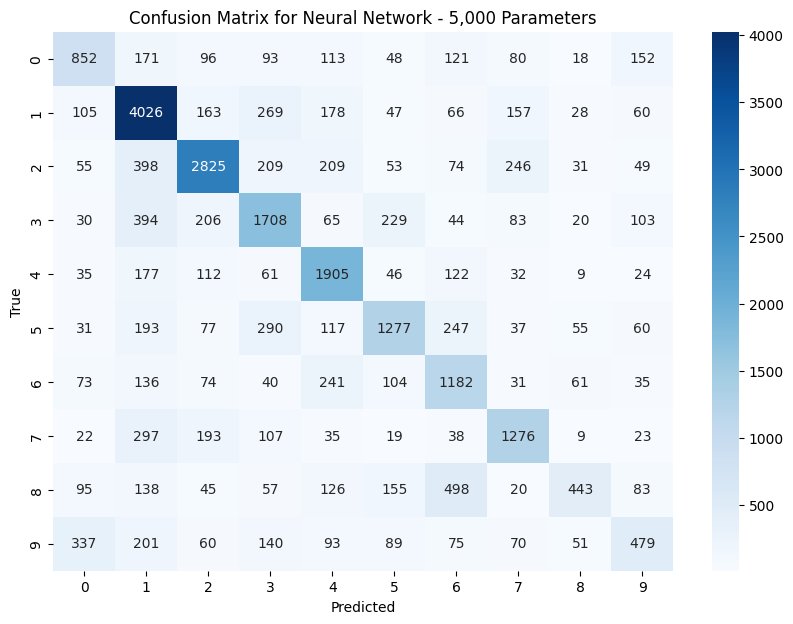

In [14]:
# Step 2: Define Neural Network Model with Approximately 5,000 Parameters
model_5k = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Uncomment this line to flatten the input
    Dense(64, activation='relu'),      # First hidden layer with 64 neurons
    Dense(32, activation='relu'),      # Second hidden layer with 32 neurons
    Dense(10, activation='softmax')    # Output layer for 10 classes
])

# Step 3: Compile and Train the Model
model_5k.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_5k.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=2)

# Step 4: Evaluate the Model on the Test Set
y_pred_5k = model_5k.predict(X_test)
y_pred_5k_labels = np.argmax(y_pred_5k, axis=1)
test_accuracy_5k = accuracy_score(y_test, y_pred_5k_labels)
print(f'Test Accuracy (Neural Network - 5,000 parameters): {test_accuracy_5k}')

# Step 5: Evaluation and Analysis
# 5.1 Identify the Label in the Test Data with the Highest Confidence
highest_confidence_index_5k = np.argmax(np.max(y_pred_5k, axis=1))
img_to_plot_5k = X_test[highest_confidence_index_5k]
if np.max(img_to_plot_5k) <= 1:
    img_to_plot_5k = (img_to_plot_5k * 255).astype(np.uint8)

plt.imshow(img_to_plot_5k)
plt.title(f"Predicted Label with Highest Confidence: {y_pred_5k_labels[highest_confidence_index_5k]}")
plt.axis('off')
plt.show()

# 5.2 Analyze Misclassifications
conf_matrix_5k = confusion_matrix(y_test, y_pred_5k_labels)
misclassified_pairs_5k = [(i, j, conf_matrix_5k[i][j]) for i in range(len(conf_matrix_5k)) for j in range(len(conf_matrix_5k)) if i != j and conf_matrix_5k[i][j] > 0]
sorted_misclassifications_5k = sorted(misclassified_pairs_5k, key=lambda x: x[2], reverse=True)
print("Frequently misclassified class pairs (NN - 5,000 parameters):")
for pair in sorted_misclassifications_5k[:5]:
    print(f"Class {pair[0]} is misclassified as Class {pair[1]}: {pair[2]} times")

# 5.3 Compare Performance Metrics
print('\nClassification Report (Neural Network - 5,000 parameters):')
print(classification_report(y_test, y_pred_5k_labels))
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_5k, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Neural Network - 5,000 Parameters')
plt.show()


Epoch 1/50
1466/1466 - 16s - 11ms/step - accuracy: 0.1624 - loss: 2.6171 - val_accuracy: 0.1467 - val_loss: 2.3809
Epoch 2/50
1466/1466 - 30s - 20ms/step - accuracy: 0.1967 - loss: 2.2660 - val_accuracy: 0.1767 - val_loss: 2.2867
Epoch 3/50
1466/1466 - 32s - 22ms/step - accuracy: 0.1867 - loss: 2.2615 - val_accuracy: 0.1878 - val_loss: 2.3007
Epoch 4/50
1466/1466 - 20s - 13ms/step - accuracy: 0.1873 - loss: 2.2603 - val_accuracy: 0.1877 - val_loss: 2.2550
Epoch 5/50
1466/1466 - 21s - 14ms/step - accuracy: 0.1968 - loss: 2.2232 - val_accuracy: 0.1761 - val_loss: 2.6969
Epoch 6/50
1466/1466 - 20s - 14ms/step - accuracy: 0.1991 - loss: 2.2067 - val_accuracy: 0.1397 - val_loss: 2.2264
Epoch 7/50
1466/1466 - 21s - 14ms/step - accuracy: 0.2053 - loss: 2.1938 - val_accuracy: 0.1897 - val_loss: 2.2310
Epoch 8/50
1466/1466 - 13s - 9ms/step - accuracy: 0.2114 - loss: 2.1917 - val_accuracy: 0.1972 - val_loss: 2.2354
Epoch 9/50
1466/1466 - 14s - 9ms/step - accuracy: 0.2150 - loss: 2.1847 - val_acc

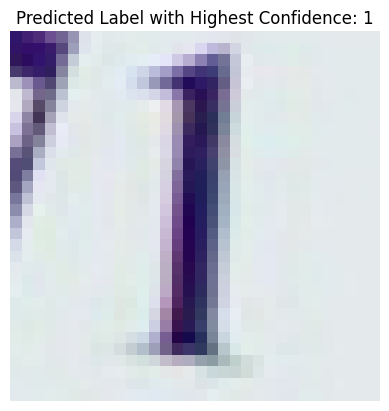

Frequently misclassified class pairs (NN - 10,000 parameters):
Class 2 is misclassified as Class 1: 3115 times
Class 3 is misclassified as Class 1: 2148 times
Class 1 is misclassified as Class 2: 1994 times
Class 5 is misclassified as Class 1: 1874 times
Class 4 is misclassified as Class 1: 1562 times

Classification Report (Neural Network - 10,000 parameters):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1744
           1       0.17      0.61      0.26      5099
           2       0.14      0.25      0.18      4149
           3       0.00      0.00      0.00      2882
           4       1.00      0.00      0.00      2523
           5       0.00      0.00      0.00      2384
           6       0.00      0.00      0.00      1977
           7       0.00      0.00      0.00      2019
           8       0.00      0.00      0.00      1660
           9       0.00      0.00      0.00      1595

    accuracy                           0

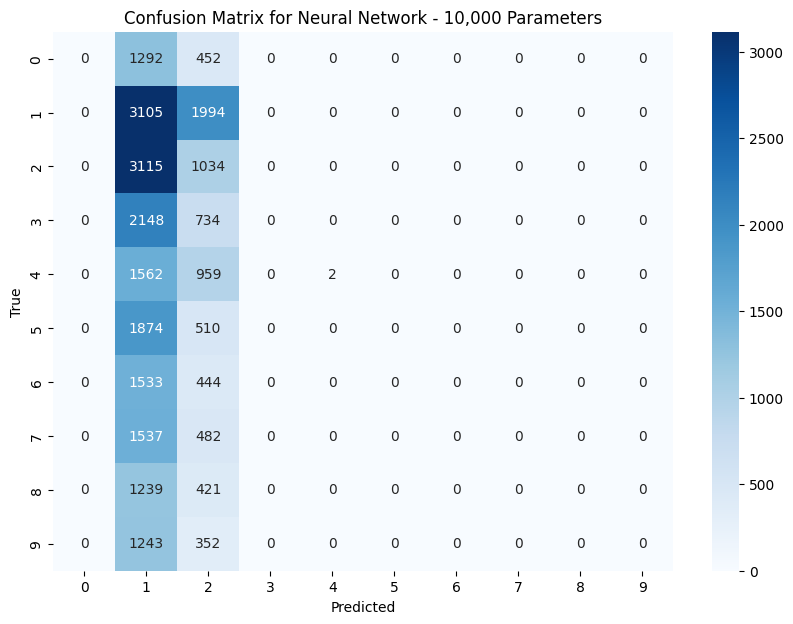

In [17]:
# Step 1: Import Necessary Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Define Neural Network Model with Approximately 10,000 Parameters
model_10k = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Flatten the image into a vector
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),  # First hidden layer with L2 regularization
    BatchNormalization(),  # Batch Normalization to stabilize learning
    Dropout(0.5),  # Dropout with 50% rate to prevent overfitting
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),  # Second hidden layer with L2 regularization
    BatchNormalization(),  # Batch Normalization
    Dropout(0.5),  # Dropout
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Step 3: Compile the Model
model_10k.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 4: Define Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Step 5: Train the Model
model_10k.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=2)

# Step 6: Evaluate the Model on the Test Set
y_pred_10k = model_10k.predict(X_test)
y_pred_10k_labels = np.argmax(y_pred_10k, axis=1)
test_accuracy_10k = accuracy_score(y_test, y_pred_10k_labels)
print(f'Test Accuracy (Neural Network - 10,000 parameters): {test_accuracy_10k}')

# Step 7: Evaluation and Analysis
# 7.1 Identify the Label in the Test Data with the Highest Confidence
highest_confidence_index_10k = np.argmax(np.max(y_pred_10k, axis=1))
img_to_plot_10k = X_test[highest_confidence_index_10k]
if np.max(img_to_plot_10k) <= 1:
    img_to_plot_10k = (img_to_plot_10k * 255).astype(np.uint8)

plt.imshow(img_to_plot_10k)
plt.title(f"Predicted Label with Highest Confidence: {y_pred_10k_labels[highest_confidence_index_10k]}")
plt.axis('off')
plt.show()

# 7.2 Analyze Misclassifications
conf_matrix_10k = confusion_matrix(y_test, y_pred_10k_labels)
misclassified_pairs_10k = [(i, j, conf_matrix_10k[i][j]) for i in range(len(conf_matrix_10k)) for j in range(len(conf_matrix_10k)) if i != j and conf_matrix_10k[i][j] > 0]
sorted_misclassifications_10k = sorted(misclassified_pairs_10k, key=lambda x: x[2], reverse=True)
print("Frequently misclassified class pairs (NN - 10,000 parameters):")
for pair in sorted_misclassifications_10k[:5]:
    print(f"Class {pair[0]} is misclassified as Class {pair[1]}: {pair[2]} times")

# 7.3 Compare Performance Metrics
print('\nClassification Report (Neural Network - 10,000 parameters):')
print(classification_report(y_test, y_pred_10k_labels))
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_10k, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Neural Network - 10,000 Parameters')
plt.show()


Epoch 1/50
1466/1466 - 18s - 12ms/step - accuracy: 0.1710 - loss: 2.5981 - val_accuracy: 0.2200 - val_loss: 2.2667
Epoch 2/50
1466/1466 - 19s - 13ms/step - accuracy: 0.2039 - loss: 2.2573 - val_accuracy: 0.2074 - val_loss: 2.1991
Epoch 3/50
1466/1466 - 14s - 9ms/step - accuracy: 0.2014 - loss: 2.2315 - val_accuracy: 0.2042 - val_loss: 2.2533
Epoch 4/50
1466/1466 - 20s - 14ms/step - accuracy: 0.1989 - loss: 2.2354 - val_accuracy: 0.1879 - val_loss: 2.2582
Epoch 5/50
1466/1466 - 21s - 14ms/step - accuracy: 0.1884 - loss: 2.2476 - val_accuracy: 0.1879 - val_loss: 2.2486
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Test Accuracy (Neural Network - 10,000 parameters): 0.2258758451137062


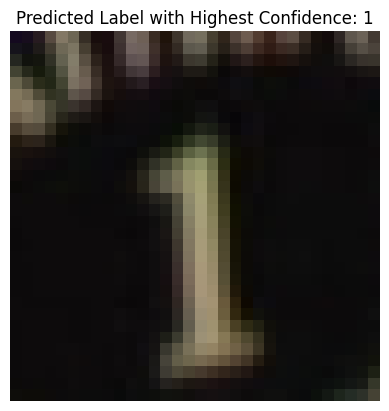

Frequently misclassified class pairs (NN - 10,000 parameters):
Class 2 is misclassified as Class 1: 2271 times
Class 3 is misclassified as Class 1: 1603 times
Class 4 is misclassified as Class 1: 1463 times
Class 5 is misclassified as Class 1: 1335 times
Class 3 is misclassified as Class 2: 1265 times

Classification Report (Neural Network - 10,000 parameters):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1744
           1       0.24      0.75      0.37      5099
           2       0.19      0.45      0.27      4149
           3       0.00      0.00      0.00      2882
           4       0.31      0.03      0.05      2523
           5       0.17      0.02      0.04      2384
           6       0.49      0.03      0.05      1977
           7       0.00      0.00      0.00      2019
           8       0.00      0.00      0.00      1660
           9       0.00      0.00      0.00      1595

    accuracy                           0

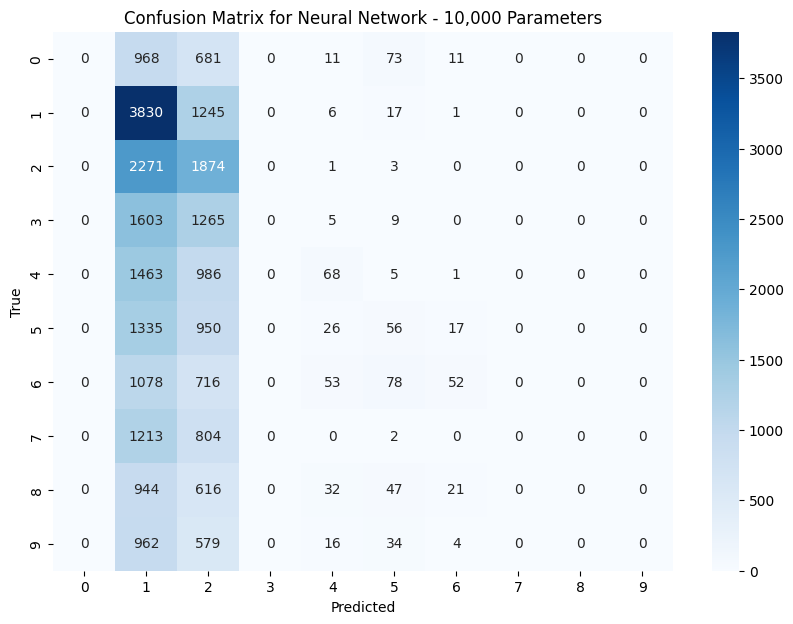

In [18]:
# Step 1: Import Necessary Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Define Neural Network Model with Approximately 10,000 Parameters
model_10k = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Flatten the image into a vector
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),  # First hidden layer with L2 regularization
    BatchNormalization(),  # Batch Normalization to stabilize learning
    Dropout(0.5),  # Dropout with 50% rate to prevent overfitting
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),  # Second hidden layer with L2 regularization
    BatchNormalization(),  # Batch Normalization
    Dropout(0.5),  # Dropout
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Step 3: Compile the Model
model_10k.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 4: Define Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Step 5: Train the Model
model_10k.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=2)

# Step 6: Evaluate the Model on the Test Set
y_pred_10k = model_10k.predict(X_test)
y_pred_10k_labels = np.argmax(y_pred_10k, axis=1)
test_accuracy_10k = accuracy_score(y_test, y_pred_10k_labels)
print(f'Test Accuracy (Neural Network - 10,000 parameters): {test_accuracy_10k}')

# Step 7: Evaluation and Analysis
# 7.1 Identify the Label in the Test Data with the Highest Confidence
highest_confidence_index_10k = np.argmax(np.max(y_pred_10k, axis=1))
img_to_plot_10k = X_test[highest_confidence_index_10k]
if np.max(img_to_plot_10k) <= 1:
    img_to_plot_10k = (img_to_plot_10k * 255).astype(np.uint8)

plt.imshow(img_to_plot_10k)
plt.title(f"Predicted Label with Highest Confidence: {y_pred_10k_labels[highest_confidence_index_10k]}")
plt.axis('off')
plt.show()

# 7.2 Analyze Misclassifications
conf_matrix_10k = confusion_matrix(y_test, y_pred_10k_labels)
misclassified_pairs_10k = [(i, j, conf_matrix_10k[i][j]) for i in range(len(conf_matrix_10k)) for j in range(len(conf_matrix_10k)) if i != j and conf_matrix_10k[i][j] > 0]
sorted_misclassifications_10k = sorted(misclassified_pairs_10k, key=lambda x: x[2], reverse=True)
print("Frequently misclassified class pairs (NN - 10,000 parameters):")
for pair in sorted_misclassifications_10k[:5]:
    print(f"Class {pair[0]} is misclassified as Class {pair[1]}: {pair[2]} times")

# 7.3 Compare Performance Metrics
print('\nClassification Report (Neural Network - 10,000 parameters):')
print(classification_report(y_test, y_pred_10k_labels))
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_10k, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Neural Network - 10,000 Parameters')
plt.show()
